<a href="https://colab.research.google.com/github/beingjumana/leukemia-cnn-model/blob/main/neuralnetworks_project_take2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
import pickle


In [2]:
  # # GitHub repository URL
# repo_url = "https://github.com/beingjumana/leukemia-cnn-model.git"

# # Clone the repository
# !git clone {repo_url}

# # Change directory to the repository
# # %cd leukemia-cnn-model

# # Define the image folders
# dataset_folder = "data"
# original_folder = os.path.join(dataset_folder, "Original")
# segmented_folder = os.path.join(dataset_folder, "Segmented")

# # Define the subfolders for each class
# classes = ["Benign", "Early Pre-B", "Pre-B", "Pro-B"]

# # Define the image data generator
# datagen = ImageDataGenerator(rescale=1./255)

# # Load the original images
# original_train_dir = original_folder
# original_train_datagen = datagen.flow_from_directory(
#     original_train_dir,
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode="categorical"
# )

# # Load the segmented images
# segmented_train_dir = segmented_folder
# segmented_train_datagen = datagen.flow_from_directory(
#     segmented_train_dir,
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode="categorical"
# )

# # Print the class labels
# print("Original images:")
# print(original_train_datagen.class_indices)
# print("Segmented images:")
# print(segmented_train_datagen.class_indices)

In [3]:
# GitHub repository URL
repo_url = "https://github.com/beingjumana/leukemia-cnn-model.git"

# Clone the repository if it doesn't already exist
if not os.path.exists("leukemia-cnn-model"):
    !git clone {repo_url}

# Change directory to the repository
%cd leukemia-cnn-model

# Define the image folders
dataset_folder = "data"
original_folder = os.path.join(dataset_folder, "Original")
segmented_folder = os.path.join(dataset_folder, "Segmented")

# Define the subfolders for each class
classes = ["Benign", "Early Pre-B", "Pre-B", "Pro-B"]

# Check if the directories exist
if not os.path.exists(original_folder):
    print(f"Directory {original_folder} does not exist.")
if not os.path.exists(segmented_folder):
    print(f"Directory {segmented_folder} does not exist.")

# Define the image data generator
datagen = ImageDataGenerator(rescale=1./255)

# Load the original images if the directory exists
if os.path.exists(original_folder):
    original_train_dir = original_folder
    original_train_datagen = datagen.flow_from_directory(
        original_train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode="categorical"
    )
    print("Original images:")
    print(original_train_datagen.class_indices)
else:
    original_train_datagen = None
    print("Original image directory not found.")

# Load the segmented images if the directory exists
if os.path.exists(segmented_folder):
    segmented_train_dir = segmented_folder
    segmented_train_datagen = datagen.flow_from_directory(
        segmented_train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode="categorical"
    )
    print("Segmented images:")
    print(segmented_train_datagen.class_indices)
else:
    segmented_train_datagen = None
    print("Segmented image directory not found.")


Cloning into 'leukemia-cnn-model'...
remote: Enumerating objects: 6450, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6450 (delta 0), reused 4 (delta 0), pack-reused 6446
Receiving objects: 100% (6450/6450), 108.62 MiB | 13.14 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Updating files: 100% (6515/6515), done.
/content/leukemia-cnn-model
Found 3256 images belonging to 4 classes.
Original images:
{'Benign': 0, 'Early': 1, 'Pre': 2, 'Pro': 3}
Found 3256 images belonging to 4 classes.
Segmented images:
{'Benign': 0, 'Early': 1, 'Pre': 2, 'Pro': 3}


In [4]:
# Define the image folders
dataset_folder = "data"
original_folder = os.path.join(dataset_folder, "Original")
segmented_folder = os.path.join(dataset_folder, "Segmented")

# Initialize the image data generator
datagen = ImageDataGenerator(rescale=1./255)

# Load the original images
original_datagen = datagen.flow_from_directory(
    original_folder,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# Load the segmented images
segmented_datagen = datagen.flow_from_directory(
    segmented_folder,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# Calculate the number of images in each dataset
num_original_images = original_datagen.samples
num_segmented_images = segmented_datagen.samples
num_total_images = num_original_images + num_segmented_images

# Get the class labels
original_classes = list(original_datagen.class_indices.keys())
segmented_classes = list(segmented_datagen.class_indices.keys())

# Print the results
print(f"1 - Name of dataset folders:")
print(f"Original Images Folder: {original_folder}")
print(f"Segmented Images Folder: {segmented_folder}")

print(f"\n2 - Sum of images in each folder:")
print(f"Original Images: {num_original_images}")
print(f"Segmented Images: {num_segmented_images}")

print(f"\n3 - Classes in each folder:")
print(f"Classes in Original Images: {original_classes}")
print(f"Classes in Segmented Images: {segmented_classes}")

print(f"\n4 - Sum of whole dataset:")
print(f"Total Images: {num_total_images}")

Found 3256 images belonging to 4 classes.
Found 3256 images belonging to 4 classes.
1 - Name of dataset folders:
Original Images Folder: data/Original
Segmented Images Folder: data/Segmented

2 - Sum of images in each folder:
Original Images: 3256
Segmented Images: 3256

3 - Classes in each folder:
Classes in Original Images: ['Benign', 'Early', 'Pre', 'Pro']
Classes in Segmented Images: ['Benign', 'Early', 'Pre', 'Pro']

4 - Sum of whole dataset:
Total Images: 6512


In [5]:
# Define the image data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load the original images
original_train_datagen = datagen.flow_from_directory(
    original_folder,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Load the segmented images
segmented_train_datagen = datagen.flow_from_directory(
    segmented_folder,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation data
original_val_datagen = datagen.flow_from_directory(
    original_folder,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

segmented_val_datagen = datagen.flow_from_directory(
    segmented_folder,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 2607 images belonging to 4 classes.
Found 2607 images belonging to 4 classes.
Found 649 images belonging to 4 classes.
Found 649 images belonging to 4 classes.


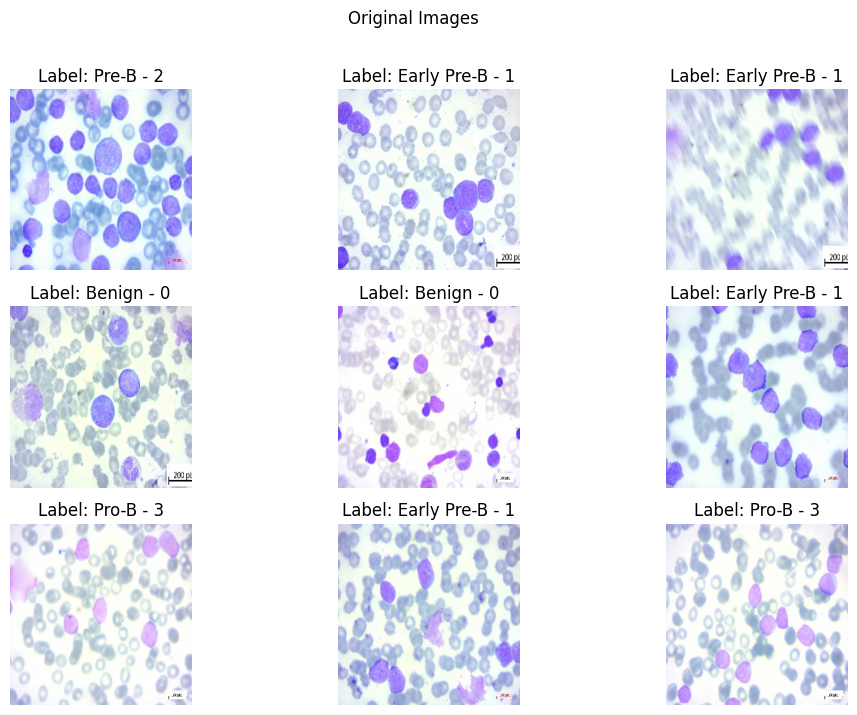

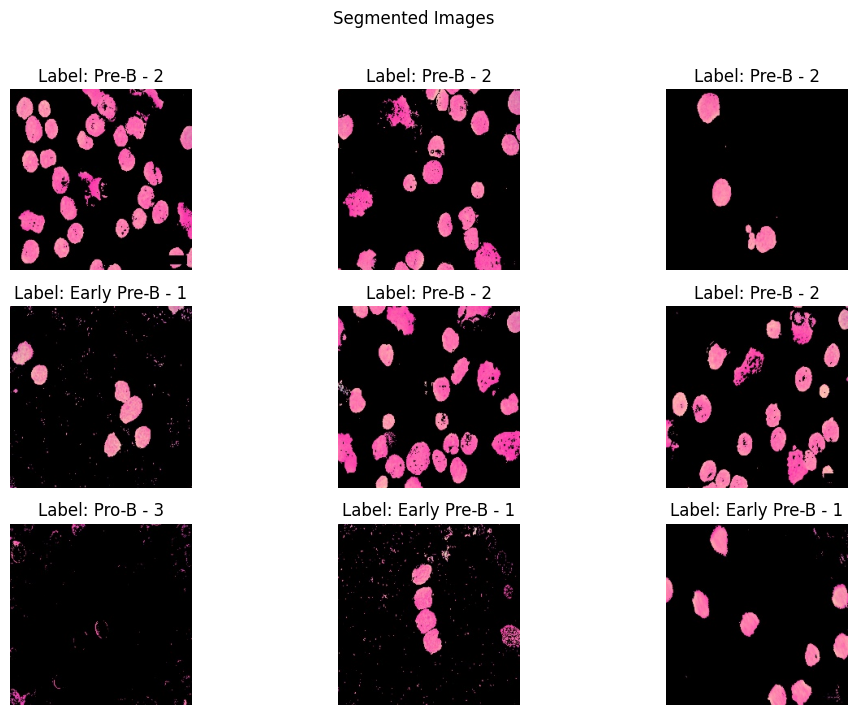

In [6]:
def plot_sample_images(data_gen, title, class_names):
    plt.figure(figsize=(12, 8))
    for i in range(9):
        img, label = data_gen.next()
        plt.subplot(3, 3, i + 1)
        plt.imshow(img[0])
        class_index = np.argmax(label[0])
        plt.title(f"Label: {class_names[class_index]} - {class_index}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Define class names
class_names = ['Benign', 'Early Pre-B', 'Pre-B', 'Pro-B']

# Plot sample images
plot_sample_images(original_train_datagen, "Original Images", class_names)
plot_sample_images(segmented_train_datagen, "Segmented Images", class_names)

#CNN model with EarlyStopping

In [ ]:
# Define the CNN model
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('model1.h5', save_best_only=True, monitor='val_loss', mode='min')

# Train the model
history1 = model1.fit(
    original_train_datagen,
    validation_data=original_val_datagen,
    epochs=25,
    callbacks=[early_stopping,checkpoint]
)

# Plot training and validation loss and accuracy
def plot_history(history1):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history1.history1['loss'], label='Training Loss')
    plt.plot(history1.history1['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history1.history1['accuracy'], label='Training Accuracy')
    plt.plot(history1.history1['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.show()

plot_history(history1)

# sample predictions
sample_images, sample_labels = next(original_val_datagen)
predictions = model1.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)
class_names = ['Benign', 'Early Pre-B', 'Pre-B', 'Pro-B']

plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_images[i])
    true_label = class_names[np.argmax(sample_labels[i])]
    predicted_label = class_names[predicted_classes[i]]
    plt.title(f"True: {true_label}, Pred: {predicted_label}")
    plt.axis('off')
plt.show()


Epoch 1/25
54/82 [==================>...........] - ETA: 1:32 - loss: 1.1567 - accuracy: 0.5459

In [ ]:
#SAVE AND LOAD model data and predictions
def save_data_and_model(model, sample_images, sample_labels, predictions, model_path='model_combined.h5'):
    # Save the model
    model.save(model_path)

    # Save the data
    with open('sample_images.pkl', 'wb') as f:
        pickle.dump(sample_images, f)
    with open('sample_labels.pkl', 'wb') as f:
        pickle.dump(sample_labels, f)
    with open('predictions.pkl', 'wb') as f:
        pickle.dump(predictions, f)

def load_data_and_model(model_path='model_combined.h5'):
    # Load the model
    model = load_model(model_path)

    # Load the data
    with open('sample_images.pkl', 'rb') as f:
        sample_images = pickle.load(f)
    with open('sample_labels.pkl', 'rb') as f:
        sample_labels = pickle.load(f)
    with open('predictions.pkl', 'rb') as f:
        predictions = pickle.load(f)

    return model, sample_images, sample_labels, predictions

In [ ]:
save_data_and_model(model1, sample_images, sample_labels, predictions)


#Adjusting Learning Rate and Using Learning Rate Scheduler


In [ ]:
# Define the CNN model for the second model
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

checkpoint = ModelCheckpoint('model2.h5', save_best_only=True, monitor='val_loss', mode='min')

# Train the model with learning rate scheduler and early stopping
history2 = model2.fit(
    original_train_datagen,
    validation_data=original_val_datagen,
    epochs=25,
    callbacks=[early_stopping, reduce_lr,checkpoint]
)

save_data_and_model(model2, sample_images, sample_labels, predictions)

plot_history(history2)

# Define the class names
class_names = ['Benign', 'Early Pre-B', 'Pre-B', 'Pro-B']

# Get a batch of validation data
sample_images, sample_labels = next(original_val_datagen)

# Make predictions
predictions = model2.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)

# Plot the results
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_images[i])
    true_label = np.argmax(sample_labels[i])
    predicted_label = predicted_classes[i]
    plt.title(f"True: {class_names[true_label]}, Pred: {class_names[predicted_label]}")
    plt.axis('off')
plt.show()

#Adding L2 regularization and Batch Normalization to the model

In [ ]:
# Define the CNN model with L2 regularization and Batch Normalization
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping and reduce learning rate on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

checkpoint = ModelCheckpoint('model.h5', save_best_only=True, monitor='val_loss', mode='min')

# Train the model
history = model.fit(
    original_train_datagen,
    validation_data=original_val_datagen,
    epochs=25,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

save_data_and_model(model, sample_images, sample_labels, predictions)

plot_history(history)


# Get a batch of validation data
sample_images, sample_labels = next(original_val_datagen)

# Predict the classes for the sample images
predictions = model.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)

# Class names
class_names = ['Benign', 'Early Pre-B', 'Pre-B', 'Pro-B']

# Plot the images with their true and predicted labels
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_images[i])
    true_label = np.argmax(sample_labels[i])
    predicted_label = predicted_classes[i]
    plt.title(f"True: {class_names[true_label]}, Pred: {class_names[predicted_label]}")
    plt.axis('off')
plt.show()

Observation:
- Training Accuracy: The training accuracy is consistently high, reaching 100% by epoch 24.
- Validation Accuracy: The validation accuracy started low but improved significantly over time, reaching 96.61% by epoch 24.
- Training Loss: The training loss decreased consistently, indicating that the model is learning.
- Validation Loss: The validation loss decreased significantly and stabilized towards the end, which is a good sign that the model is not overfitting.

In [ ]:
# Define the CNN model with L2 regularization and Batch Normalization
model_seg = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model_seg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping and reduce learning rate on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

checkpoint = ModelCheckpoint('model_seg.h5', save_best_only=True, monitor='val_loss', mode='min')

# Train the model_seg
history_seg = model_seg.fit(
    segmented_train_datagen,
    validation_data=segmented_val_datagen,
    epochs=25,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

save_data_and_model(model_seg, sample_images, sample_labels, predictions)

plot_history(history_seg)

# Get a batch of validation data
sample_images, sample_labels = next(segmented_val_datagen)

# Predict the classes for the sample images
predictions = model_seg.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)

# Class names
class_names = ['Benign', 'Early Pre-B', 'Pre-B', 'Pro-B']

# Plot the images with their true and predicted labels
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_images[i])
    true_label = np.argmax(sample_labels[i])
    predicted_label = predicted_classes[i]
    plt.title(f"True: {class_names[true_label]}, Pred: {class_names[predicted_label]}")
    plt.axis('off')
plt.show()


In [ ]:
#learning rate comparision
def plot_learning_rates(*histories, labels=None):
    """
    Plot the learning rate over epochs for multiple models.

    Args:
    *histories (list of Keras History objects): Variable length argument list of history objects.
    labels (list of str): List of labels for the models. Must match the number of histories provided.

    """
    plt.figure(figsize=(12, 6))

    if labels is None:
        labels = [f'Model {i+1}' for i in range(len(histories))]

    for i, history in enumerate(histories):
        plt.plot(history.history['lr'], label=labels[i])

    plt.title('Learning Rate over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.legend()
    plt.show()

plot_learning_rates(history1, history, history_seg, labels=['Model 1 Original', 'Model 2 Original', 'Model Segmented'])


#Combined

In [ ]:
def combined_generator(gen1, gen2):
    while True:
        X1i, y1i = gen1.next()
        X2i, y2i = gen2.next()
        yield np.concatenate((X1i, X2i), axis=0), np.concatenate((y1i, y2i), axis=0)

combined_train_datagen = combined_generator(original_train_datagen, segmented_train_datagen)
combined_val_datagen = combined_generator(original_val_datagen, segmented_val_datagen)


In [ ]:
# Define the CNN model with L2 regularization and Batch Normalization
batch_size = 32

# Calculate the number of steps per epoch for training
train_steps_per_epoch = sum([original_train_datagen.samples, segmented_train_datagen.samples]) // batch_size

# Calculate the number of validation steps
validation_steps = sum([original_val_datagen.samples, segmented_val_datagen.samples]) // batch_size

# Define the CNN model with L2 regularization and Batch Normalization
model_combined = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model_combined.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping and reduce learning rate on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

checkpoint = ModelCheckpoint('model_combined.h5', save_best_only=True, monitor='val_loss', mode='min')

# Train the model
history_combined = model_combined.fit(
    combined_train_datagen,
    validation_data=combined_val_datagen,
    steps_per_epoch=train_steps_per_epoch,
    validation_steps=validation_steps,
    epochs=25,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

save_data_and_model(model_combined, sample_images, sample_labels, predictions)


# Call the plot_history function to visualize the training history
plot_history(history_combined)

# Get a batch of validation data
sample_images, sample_labels = next(combined_val_datagen)

# Predict the classes for the sample images
predictions = model_combined.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)

# Class names
class_names = ['Benign', 'Early Pre-B', 'Pre-B', 'Pro-B']

# Plot the images with their true and predicted labels
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_images[i])
    true_label = np.argmax(sample_labels[i])
    predicted_label = predicted_classes[i]
    plt.title(f"True: {class_names[true_label]}, Pred: {class_names[predicted_label]}")
    plt.axis('off')
plt.show()


In [ ]:
# Save the trained model
model_combined.save('/content/model_combined.h5')